In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
train_data = df.iloc[:108]
test_data = df.iloc[108:]

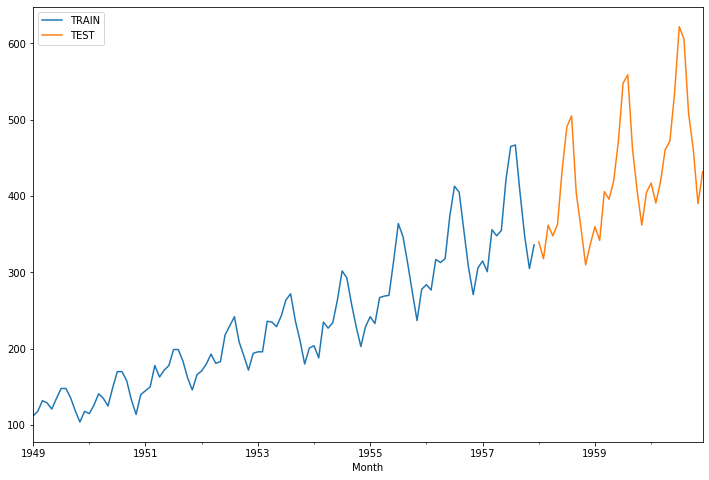

In [4]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

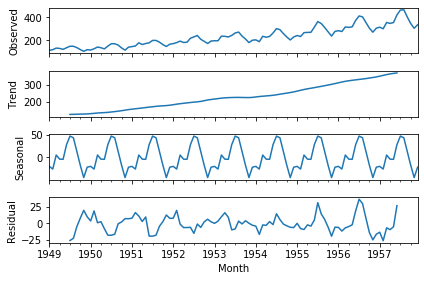

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(train_data['#Passengers']).plot();

In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12 # The model will consider the last 12 months weighted average for forecasting
alpha = 2/(span+1)
model = SimpleExpSmoothing(train_data['#Passengers']).fit(smoothing_level=alpha)
test_predictions = model.forecast(36).rename('SES Forecast')

ValueError: Buffer dtype mismatch, expected 'double' but got 'long long'

NameError: name 'test_predictions' is not defined

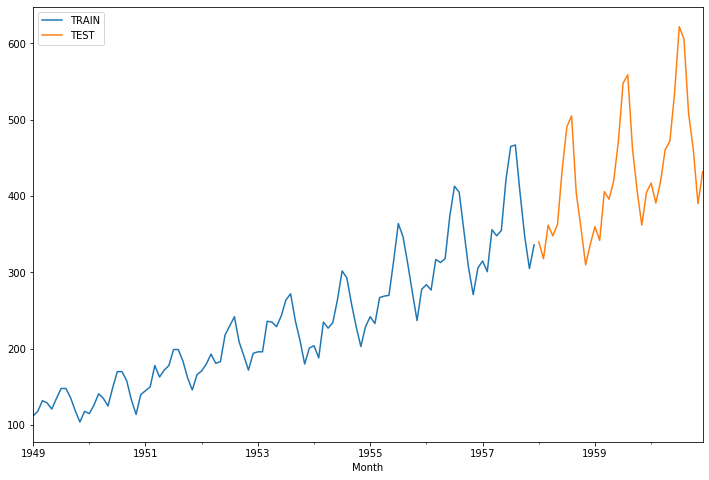

In [34]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');


In [32]:
model=model.fit(smoothing_level=2/(span+1))

ValueError: Buffer dtype mismatch, expected 'double' but got 'long long'

NameError: name 'test_predictions' is not defined

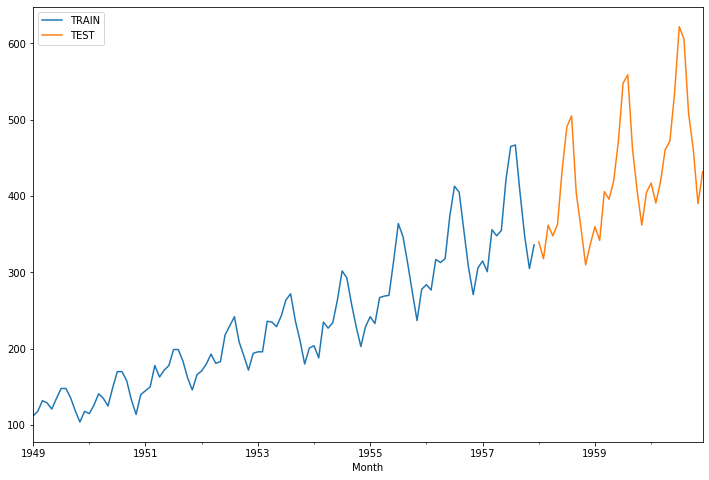

In [35]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');


In [36]:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(test_data['#Passengers'],test_predictions))
print("RMS Error is ",rms_error)

NameError: name 'test_predictions' is not defined

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
double_model = ExponentialSmoothing(train_data['Passengers'],trend='add').fit()
test_predictions = double_model.forecast(36).rename('DES Forecast')

KeyError: 'Passengers'

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
double_model = ExponentialSmoothing(train_data['#Passengers'],trend='add').fit()
test_predictions = double_model.forecast(36).rename('DES Forecast')

ValueError: Buffer dtype mismatch, expected 'double' but got 'long long'

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#Creating a model object for simple exp smoothing
model = SimpleExpSmoothing(train['Passengers'])
#Smoothing level is the alpha parmeter, i.e the weight assigned to the latest data point
model_fit = model.fit(smoothing_level = 0.2, optimized = False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)